<a href="https://colab.research.google.com/github/Elixirman/Blackbox/blob/main/Code_Basics_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Importation

In [ ]:
import pandas as pd

# Load Data and preview Data
booking = pd.read_csv("/content/fact_bookings.csv")
booking.head(-5)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
...,...,...,...,...,...,...,...,...,...,...,...,...
134580,Jul312217564RT41,17564,31-07-22,31-07-22,2/8/2022,1.0,RT4,direct online,NaN,Checked Out,32300,32300
134581,Jul312217564RT42,17564,31-07-22,31-07-22,1/8/2022,4.0,RT4,makeyourtrip,4.0,Checked Out,38760,38760
134582,Jul312217564RT43,17564,31-07-22,31-07-22,3/8/2022,1.0,RT4,others,1.0,Checked Out,32300,32300
134583,Jul312217564RT44,17564,31-07-22,31-07-22,1/8/2022,1.0,RT4,others,NaN,Cancelled,32300,12920


In [ ]:
# Check Data shape

booking.shape

(134590, 12)

In [ ]:
# Check Column

booking.columns

Index(['booking_id', 'property_id', 'booking_date', 'check_in_date',
       'checkout_date', 'no_guests', 'room_category', 'booking_platform',
       'ratings_given', 'booking_status', 'revenue_generated',
       'revenue_realized'],
      dtype='object')

In [ ]:
# Check Unique "room_category" column
booking.room_category.unique()

array(['RT1', 'RT2', 'RT3', 'RT4'], dtype=object)

In [ ]:
# Check number of count of each "room_category" booked
booking.room_category.value_counts()

RT2    49505
RT1    38446
RT3    30566
RT4    16073
Name: room_category, dtype: int64

## Room Category Chart

<Axes: >

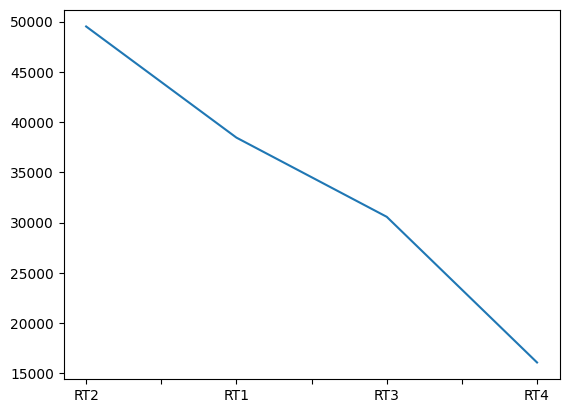

In [ ]:
booking.room_category.value_counts().plot()

<Axes: >

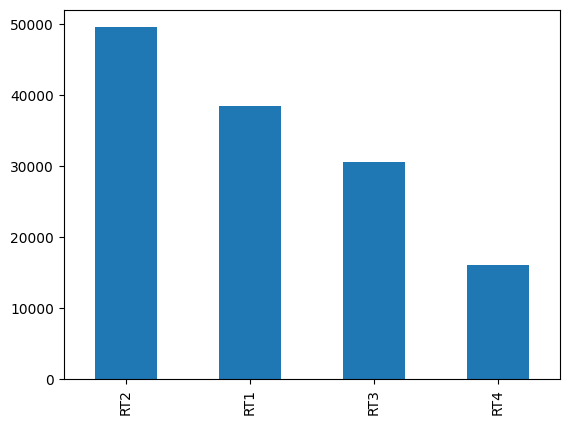

In [ ]:
booking.room_category.value_counts().plot.bar()

<Axes: >

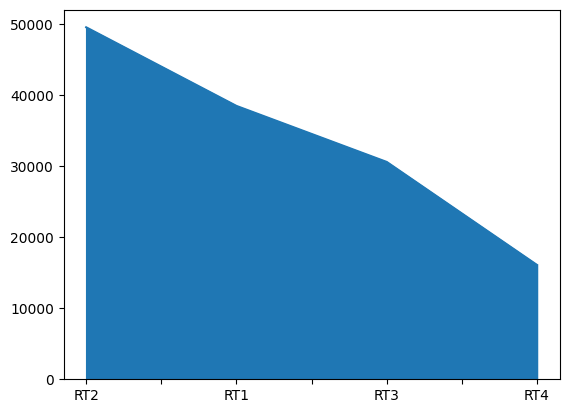

In [ ]:
booking.room_category.value_counts().plot.area()

In [ ]:
#Stats of the numeric Columns
booking.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


In [ ]:
# Checking min & max revenue realized
booking.revenue_realized.min(), booking.revenue_realized.max()

(2600, 45220)

In [ ]:
# Loading Other data files

date = pd.read_csv("/content/dim_date.csv")
hotel = pd.read_csv("/content/dim_hotels.csv")
room = pd.read_csv("/content/dim_rooms.csv")
agg_booking = pd.read_csv("/content/fact_aggregated_bookings.csv")



# Data Exploration

In [ ]:
# Shape of each datarame
date.shape, hotel.shape, room.shape, agg_booking.shape

((92, 4), (25, 4), (4, 2), (9200, 5))

EXERCISE

In [ ]:
# Exercise-1. Find out unique property_ids in aggregate bookings dataset
agg_booking.columns

Index(['property_id', 'check_in_date', 'room_category', 'successful_bookings',
       'capacity'],
      dtype='object')

In [ ]:
agg_booking.property_id.unique()

array([16559, 19562, 19563, 17558, 16558, 17560, 19558, 19560, 17561,
       16560, 16561, 16562, 16563, 17559, 17562, 17563, 18558, 18559,
       18561, 18562, 18563, 19559, 19561, 17564, 18560])

In [ ]:
# Exercise-2. Find out total bookings per property_id

agg_booking.groupby("property_id")["successful_bookings"].sum()

property_id
16558    3153
16559    7338
16560    4693
16561    4418
16562    4820
16563    7211
17558    5053
17559    6142
17560    6013
17561    5183
17562    3424
17563    6337
17564    3982
18558    4475
18559    5256
18560    6638
18561    6458
18562    7333
18563    4737
19558    4400
19559    4729
19560    6079
19561    5736
19562    5812
19563    5413
Name: successful_bookings, dtype: int64

In [ ]:
# Exercise-3. Find out days on which bookings are greater than capacity

agg_booking.head(1)

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0


In [ ]:
# Convert 'check_in_date' column to datetime type if it's not already
agg_booking['check_in_date'] = pd.to_datetime(agg_booking['check_in_date'])

# Filter rows where successful_bookings are greater than capacity
overbooked_days_check_in = agg_booking[agg_booking['successful_bookings'] > agg_booking['capacity']]['check_in_date'].dt.date.unique()

# Print the days on which successful_bookings are greater than capacity
print("Days with successful bookings greater than capacity:")
for day in overbooked_days_check_in:
    print(day)


Days with successful bookings greater than capacity:
2022-05-01
2022-06-11
2022-07-02
2022-07-25
2022-07-31


In [ ]:
# Convert 'check_in_date' column to datetime type if it's not already
agg_booking['check_in_date'] = pd.to_datetime(agg_booking['check_in_date'])

# Filter rows using a lambda function
overbooked_days_check_in = agg_booking.loc[agg_booking.apply(lambda row: row['successful_bookings'] > row['capacity'], axis=1), 'check_in_date'].dt.date.unique()

# Print the days on which successful_bookings are greater than capacity
print("Days with successful bookings greater than capacity:")
for day in overbooked_days_check_in:
    print(day)


Days with successful bookings greater than capacity:
2022-05-01
2022-06-11
2022-07-02
2022-07-25
2022-07-31


In [ ]:
# # Exercise-3. Find out days on which bookings are greater than capacity

agg_booking[agg_booking.successful_bookings>agg_booking.capacity]

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,2022-05-01,RT1,30,19.0
12,16563,2022-05-01,RT1,100,41.0
4136,19558,2022-06-11,RT2,50,39.0
6209,19560,2022-07-02,RT1,123,26.0
8522,19559,2022-07-25,RT1,35,24.0
9194,18563,2022-07-31,RT4,20,18.0


In [ ]:
# Exercise-4. Find out properties that have highest capacity

# preview data_head
agg_booking.head(2)

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,2022-05-01,RT1,25,30.0
1,19562,2022-05-01,RT1,28,30.0


In [ ]:
agg_booking.capacity.max()

50.0

In [ ]:
agg_booking.room_category.unique()

array(['RT1', 'RT2', 'RT3', 'RT4'], dtype=object)

In [ ]:
# Exercise-4. Find out properties that have highest capacity

agg_booking[agg_booking.capacity==agg_booking.capacity.max()]

,property_id,check_in_date,room_category,successful_bookings,capacity
27,17558,2022-05-01,RT2,38,50.0
128,17558,2022-05-02,RT2,27,50.0
229,17558,2022-05-03,RT2,26,50.0
328,17558,2022-05-04,RT2,27,50.0
428,17558,2022-05-05,RT2,29,50.0
...,...,...,...,...,...
8728,17558,2022-07-27,RT2,22,50.0
8828,17558,2022-07-28,RT2,21,50.0
8928,17558,2022-07-29,RT2,23,50.0
9028,17558,2022-07-30,RT2,32,50.0


In [ ]:
agg_booking.groupby('room_category')[['capacity']==50]

KeyError: 'Column not found: False'

In [ ]:
# Group the data by property and find the maximum capacity within each group
max_capacity_per_property = agg_booking.groupby('room_category')['capacity'].max()

# Find the properties with the highest capacity
properties_with_highest_capacity = max_capacity_per_property[max_capacity_per_property == max_capacity_per_property.max()]

# Display the properties with the highest capacity
print("Properties with the highest capacity:")
print(properties_with_highest_capacity)


# Data Cleaning

In [ ]:
booking.describe()

In [ ]:
# Checking number of guests "no_guests" less than zero

booking[ booking.no_guests <=0]

In [ ]:
len(booking[ booking.no_guests <=0])

In [ ]:
# If we choose to ignore the reecords with -ve values, we would filter them out

booking_f = booking[ booking.no_guests >0]
booking_f

In [ ]:
# View shape
booking_f.shape

In [ ]:
# Checking min and Max revenue generated

booking_f.revenue_generated.min(),booking_f.revenue_generated.max()

In [ ]:
# filtering outliners using standard Deviation
# avg = average // std = Standard Deviation
avg = booking_f.revenue_generated.mean()
std = booking_f.revenue_generated.std()

In [ ]:
avg,std

In [ ]:
higher_limit = avg + (3*std)
higher_limit

In [ ]:
lower_limit = avg - (3*std)
lower_limit

In [ ]:
# Checking values lesser than 0

booking_f[booking_f.revenue_generated <=0]

In [ ]:
booking_f[booking_f.revenue_generated >=0]

In [ ]:
# remove revenue generated greater than the higher limit

booking_f[booking_f.revenue_generated >= higher_limit]

In [ ]:
len(booking_f[booking_f.revenue_generated >= higher_limit])

In [ ]:
# Valid values should be lesser than higher_limit

booking_ft = booking_f[booking_f.revenue_generated < higher_limit]
booking_ft

In [ ]:
booking_ft.shape

In [ ]:
# Checking revenue_realized column

booking_ft.describe()

In [ ]:
# filtering outliners using standard Deviation
# avg = average // std = Standard Deviation

avg = booking_f.revenue_realized.mean()
std = booking_f.revenue_realized.std()

In [ ]:
avg , std

In [ ]:
higher_limit = avg + (3*std)
higher_limit

In [ ]:
# Check values greater than the Higher_limit

booking_ft[booking_ft.revenue_realized > higher_limit]

In [ ]:
# the room_category indictes they all are classed in the RT4 section

# view the rooms column
room

In [ ]:
# It shows RT4 is classified as a Presidential class
# So its possible , lets Observe the std for just RT4s

booking_ft[booking_ft.room_category == "RT4"].revenue_realized.describe()

In [ ]:
# Recall Outliner = mean + (3*std)

23439.308444 + (3*9048.599076)

In [ ]:
# Checking for missing values
booking_ft.isnull().sum()

In [ ]:
# Checking for NaN values
booking_ft.isna().sum()

In [ ]:
#Exercise-1. In aggregate bookings find columns that have null values.
# Fill these null values with whatever you think is the appropriate subtitute (possible ways is to use mean or median)

agg_booking.head()

In [ ]:
agg_booking.isnull().sum()

In [ ]:
agg_booking.isna().sum()

In [ ]:
agg_booking[agg_booking["capacity"].isnull()] , len(agg_booking[agg_booking["capacity"].isnull()])

In [ ]:
# Calculate the mean of non-null values in the 'capacity' column
capacity_mean = agg_booking['capacity'].mean()

# Fill null values in the 'capacity' column with the mean
agg_booking['capacity'].fillna(capacity_mean, inplace=True)

# Print the DataFrame after filling null values
print(agg_booking)


In [ ]:
agg_booking[agg_booking["capacity"].isnull()]

In [ ]:
agg_booking.isnull().sum()

In [ ]:
# Exercise-2. In aggregate bookings find out records that have successful_bookings value greater than capacity.
# Filter those records

# Recall data head
agg_booking.head(1)

In [ ]:
agg_booking[agg_booking["successful_bookings"] > agg_booking["capacity"]]

In [ ]:
# To filter them out
agg_booking = agg_booking[agg_booking["successful_bookings"] <= agg_booking["capacity"]]
agg_booking

# Data Transformation

In [ ]:
agg_booking.head()

In [ ]:
# Establishing Occupancy Percentage

agg_booking["occ_percent"] = agg_booking["successful_bookings"] / agg_booking["capacity"]

In [ ]:
agg_booking.head()

In [ ]:
# Using Lambda function // converting from decimal to % @ decimal place 1

agg_booking["occ_percent"] = agg_booking["occ_percent"].apply(lambda x: round(x*100, 1))

In [ ]:
agg_booking.head()

# Insight Generation

In [ ]:
# What is the average Occupancy in each of the categories ?
#recall,

agg_booking.head(2)

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,2022-05-01,RT1,25,30.0
1,19562,2022-05-01,RT1,28,30.0


In [ ]:
agg_booking.groupby("room_category")["occ_percent"].mean()

KeyError: 'Column not found: occ_percent'

In [ ]:
# Recall, room:

room


,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [ ]:
# Merging both output to generate acomprehensive report

df = pd.merge(agg_booking, room, left_on="room_category", right_on="room_id")
df.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,room_id,room_class
0,16559,2022-05-01,RT1,25,30.0,RT1,Standard
1,19562,2022-05-01,RT1,28,30.0,RT1,Standard
2,19563,2022-05-01,RT1,23,30.0,RT1,Standard
3,17558,2022-05-01,RT1,30,19.0,RT1,Standard
4,16558,2022-05-01,RT1,18,19.0,RT1,Standard


In [ ]:
df.groupby("room_class")["occ_percent"].mean()

KeyError: 'Column not found: occ_percent'

In [ ]:
# room_category and room_id appears to be the same // dropping room_id
df.drop("room_id", axis= 1, inplace= True)


In [ ]:
if "room_id" in df.columns:
    df.drop("room_id", axis=1, inplace=True)
df

,property_id,check_in_date,room_category,successful_bookings,capacity,room_class
0,16559,2022-05-01,RT1,25,30.0,Standard
1,19562,2022-05-01,RT1,28,30.0,Standard
2,19563,2022-05-01,RT1,23,30.0,Standard
3,17558,2022-05-01,RT1,30,19.0,Standard
4,16558,2022-05-01,RT1,18,19.0,Standard
...,...,...,...,...,...,...
9195,16563,2022-07-31,RT4,13,18.0,Presidential
9196,16559,2022-07-31,RT4,13,18.0,Presidential
9197,17558,2022-07-31,RT4,3,6.0,Presidential
9198,19563,2022-07-31,RT4,3,6.0,Presidential


In [ ]:
# Print Average Occupancy rate per city
# Recall;

hotel.head()

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [ ]:
# We ned to merge frames, "hotel" and "df"

df = pd.merge(df, hotel, on= "property_id")
df.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,room_class,property_name,category,city
0,16559,2022-05-01,RT1,25,30.0,Standard,Atliq Exotica,Luxury,Mumbai
1,16559,2022-05-02,RT1,20,30.0,Standard,Atliq Exotica,Luxury,Mumbai
2,16559,2022-05-03,RT1,17,30.0,Standard,Atliq Exotica,Luxury,Mumbai
3,16559,2022-05-04,RT1,21,30.0,Standard,Atliq Exotica,Luxury,Mumbai
4,16559,2022-05-05,RT1,16,30.0,Standard,Atliq Exotica,Luxury,Mumbai


In [ ]:
df.groupby("city")["occ_percent"].mean()

KeyError: 'Column not found: occ_percent'

In [ ]:
df_city = df[["city_x", "city_y", "occ_percent"]]
df_city

KeyError: "None of [Index(['city_x', 'city_y', 'occ_percent'], dtype='object')] are in the [columns]"

In [ ]:
df_city.loc[7]

NameError: name 'df_city' is not defined

In [ ]:
# When was the Occupancy better, ? Weekend or Weekday ?
df.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,room_class,property_name,category,city
0,16559,2022-05-01,RT1,25,30.0,Standard,Atliq Exotica,Luxury,Mumbai
1,16559,2022-05-02,RT1,20,30.0,Standard,Atliq Exotica,Luxury,Mumbai
2,16559,2022-05-03,RT1,17,30.0,Standard,Atliq Exotica,Luxury,Mumbai
3,16559,2022-05-04,RT1,21,30.0,Standard,Atliq Exotica,Luxury,Mumbai
4,16559,2022-05-05,RT1,16,30.0,Standard,Atliq Exotica,Luxury,Mumbai


In [ ]:
# Call date Dataframe
date.head(2)

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday


In [ ]:
# Merge both frames by date and check_in_date
date["date"] = pd.to_datetime(date["date"])

df = pd.merge(df, date, left_on= "check_in_date", right_on= "date")

df.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,room_class,property_name,category,city,date,mmm yy,week no,day_type
0,16559,2022-05-01,RT1,25,30.0,Standard,Atliq Exotica,Luxury,Mumbai,2022-05-01,May 22,W 19,weekend
1,16559,2022-05-01,RT2,35,41.0,Elite,Atliq Exotica,Luxury,Mumbai,2022-05-01,May 22,W 19,weekend
2,16559,2022-05-01,RT3,27,32.0,Premium,Atliq Exotica,Luxury,Mumbai,2022-05-01,May 22,W 19,weekend
3,16559,2022-05-01,RT4,17,18.0,Presidential,Atliq Exotica,Luxury,Mumbai,2022-05-01,May 22,W 19,weekend
4,19562,2022-05-01,RT1,28,30.0,Standard,Atliq Bay,Luxury,Bangalore,2022-05-01,May 22,W 19,weekend


In [ ]:
if "date_type" in df.columns:
    d = df.groupby("date_type")["occ_percent"].mean()
    print(d)
d

NameError: name 'd' is not defined

In [ ]:
# In the month of June what was the occupancy

In [ ]:
df.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,room_class,property_name,category,city,date,mmm yy,week no,day_type
0,16559,2022-05-01,RT1,25,30.0,Standard,Atliq Exotica,Luxury,Mumbai,2022-05-01,May 22,W 19,weekend
1,16559,2022-05-01,RT2,35,41.0,Elite,Atliq Exotica,Luxury,Mumbai,2022-05-01,May 22,W 19,weekend
2,16559,2022-05-01,RT3,27,32.0,Premium,Atliq Exotica,Luxury,Mumbai,2022-05-01,May 22,W 19,weekend
3,16559,2022-05-01,RT4,17,18.0,Presidential,Atliq Exotica,Luxury,Mumbai,2022-05-01,May 22,W 19,weekend
4,19562,2022-05-01,RT1,28,30.0,Standard,Atliq Bay,Luxury,Bangalore,2022-05-01,May 22,W 19,weekend


In [ ]:
df["mmm yy_y"].unique() , df["mmm yy_x"].unique()

KeyError: 'mmm yy_y'

In [ ]:
df_june = df[ df["mmm yy_x"]== "Jun 22"]
df_june.head()

KeyError: 'mmm yy_x'

In [ ]:
# Round = rounds to the decimal place // sort arranges from small to Large //
df_june.groupby("city_x")["occ_percent"].mean().round(2).sort_values()

NameError: name 'df_june' is not defined

In [ ]:
# Trying to append August data
aug_data = pd.read_csv("/content/new_data_august.csv")
aug_data.head(1)

,property_id,property_name,category,city,room_category,room_class,check_in_date,mmm yy,week no,day_type,successful_bookings,capacity,occ%
0,16559,Atliq Exotica,Luxury,Mumbai,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,30,100.0


In [ ]:
df_new = pd.concat([df, aug_data], ignore_index=True, axis=0)
df_new.head(-2)

,property_id,check_in_date,room_category,successful_bookings,capacity,room_class,property_name,category,city,date,mmm yy,week no,day_type,occ%
0,16559,2022-05-01 00:00:00,RT1,25,30.0,Standard,Atliq Exotica,Luxury,Mumbai,2022-05-01,May 22,W 19,weekend,NaN
1,16559,2022-05-01 00:00:00,RT2,35,41.0,Elite,Atliq Exotica,Luxury,Mumbai,2022-05-01,May 22,W 19,weekend,NaN
2,16559,2022-05-01 00:00:00,RT3,27,32.0,Premium,Atliq Exotica,Luxury,Mumbai,2022-05-01,May 22,W 19,weekend,NaN
3,16559,2022-05-01 00:00:00,RT4,17,18.0,Presidential,Atliq Exotica,Luxury,Mumbai,2022-05-01,May 22,W 19,weekend,NaN
4,19562,2022-05-01 00:00:00,RT1,28,30.0,Standard,Atliq Bay,Luxury,Bangalore,2022-05-01,May 22,W 19,weekend,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9200,16559,01-Aug-22,RT1,30,30.0,Standard,Atliq Exotica,Luxury,Mumbai,NaT,Aug-22,W 32,weekeday,100.00
9201,19562,01-Aug-22,RT1,21,30.0,Standard,Atliq Bay,Luxury,Bangalore,NaT,Aug-22,W 32,weekeday,70.00
9202,19563,01-Aug-22,RT1,23,30.0,Standard,Atliq Palace,Business,Bangalore,NaT,Aug-22,W 32,weekeday,76.67
9203,19558,01-Aug-22,RT1,30,40.0,Standard,Atliq Grands,Luxury,Bangalore,NaT,Aug-22,W 32,weekeday,75.00


In [ ]:
df_new.shape

(9207, 14)